# Dataset analysis and Inference

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

seed = 42

In [2]:
from pipeline import *

df = select_and_filter("dataset_v1.csv",used_cols,cat_cols,resample="None",random_state=seed)
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("VOTED", axis=1), df["VOTED"], test_size=0.2, random_state=seed
)
df = pd.concat([X_train, y_train], axis=1)


set()


In [3]:
df_raw = pd.read_csv("dataset_v1.csv")
orig_cols = df_raw.columns
print("Used columns:\n",df.columns)
print("Not used columns:\n",set(orig_cols) - set(df.columns))


Used columns:
 Index(['GQTYPE', 'STATEFIP', 'METRO', 'FAMINC', 'NFAMS', 'INTTYPE', 'RELATE',
       'AGE', 'SEX', 'RACE', 'MARST', 'VETSTAT', 'FAMSIZE', 'NCHILD', 'NCHLT5',
       'NSIBS', 'BPL', 'YRIMMIG', 'CITIZEN', 'MBPL', 'FBPL', 'NATIVITY',
       'HISPAN', 'EMPSTAT', 'CLASSWKR', 'UHRSWORKT', 'EDUC', 'DIFFANY',
       'COVIDUNAW', 'EMPSTAT_HEAD', 'EDUC_HEAD', 'COVIDPAID', 'VOTERES',
       'VOTED'],
      dtype='object')
Not used columns:
 {'VOSUPPWT', 'ELIGORG', 'ELDCH', 'HHINTYPE', 'POPSTAT', 'COVIDTELEW', 'EARNWT', 'CPSIDP', 'OCC', 'WTFINL', 'UHRSWORKORG', 'YNGCH', 'EARNWEEK', 'UNION', 'METFIPS', 'VOTEHOW', 'HWTFINL', 'JOBCERT', 'COMPWT', 'VOWHYNOT'}


We plot the histogram of the target variable

Text(0, 0.5, 'Count')

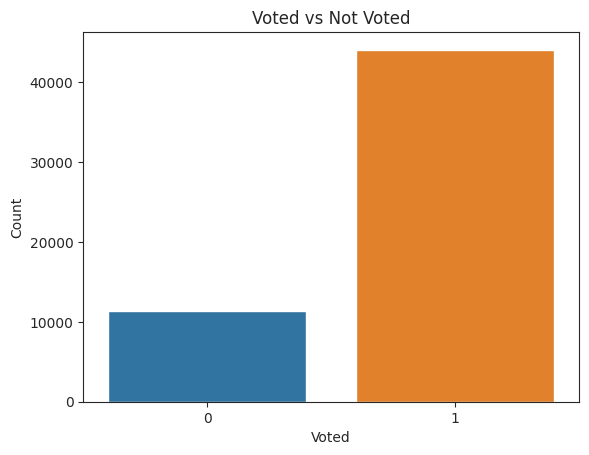

In [4]:
sns.set_style("ticks")
fig = sns.countplot(x="VOTED", data=df)
plt.title("Voted vs Not Voted")
plt.xlabel("Voted")
plt.ylabel("Count")


We start by analysing the histogram of the numerical variables, with the bars colored by the target variable

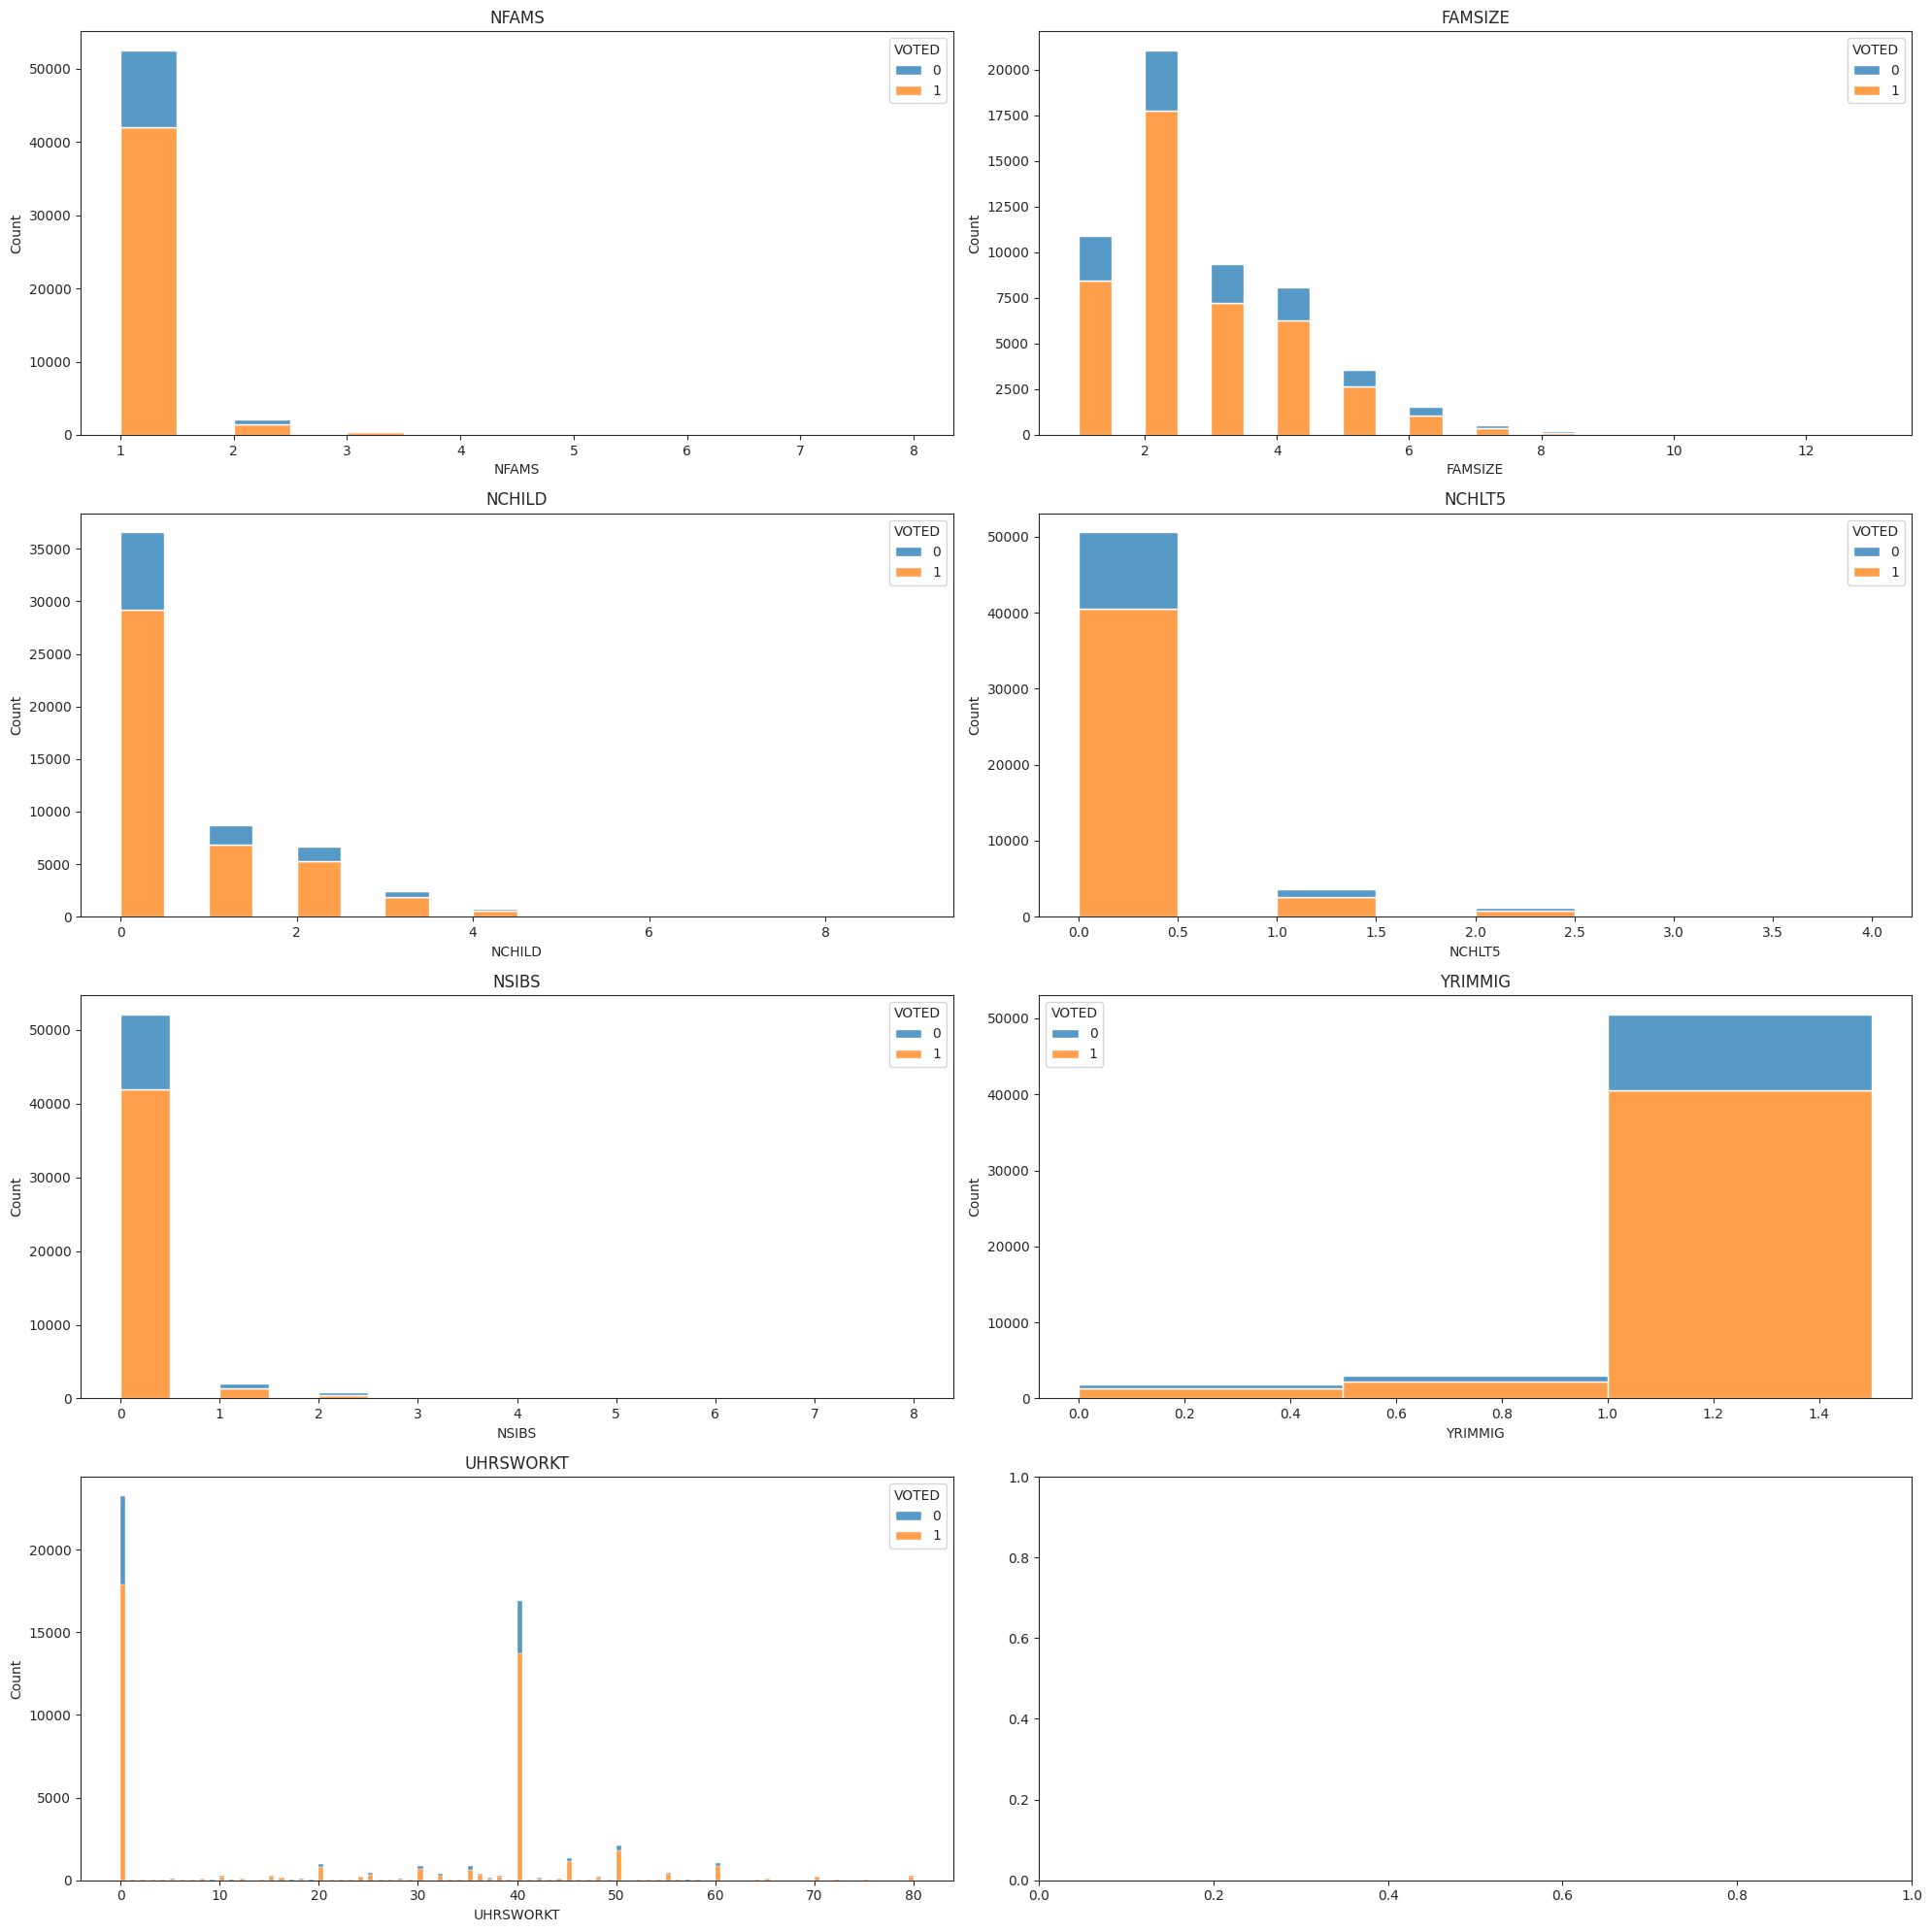

In [5]:
fig, axes = plt.subplots(4,2,figsize=(20,20))

for i, c in enumerate(num_cols_basic+num_cols_imputate):
    if c =='VOTED':
        continue
    ax = axes.reshape(-1)[i]
    if df[c].dtype.kind == 'O':
        ct = pd.crosstab(index=df[c], columns=df['VOTED'],normalize='index')
        a = ct.plot(kind='bar', stacked=True,ax=ax)  
    else:
        b = sns.histplot(x=c,hue='VOTED',data=df,multiple='stack',ax=ax,binwidth=0.5)
    t = ax.set_title(c)
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

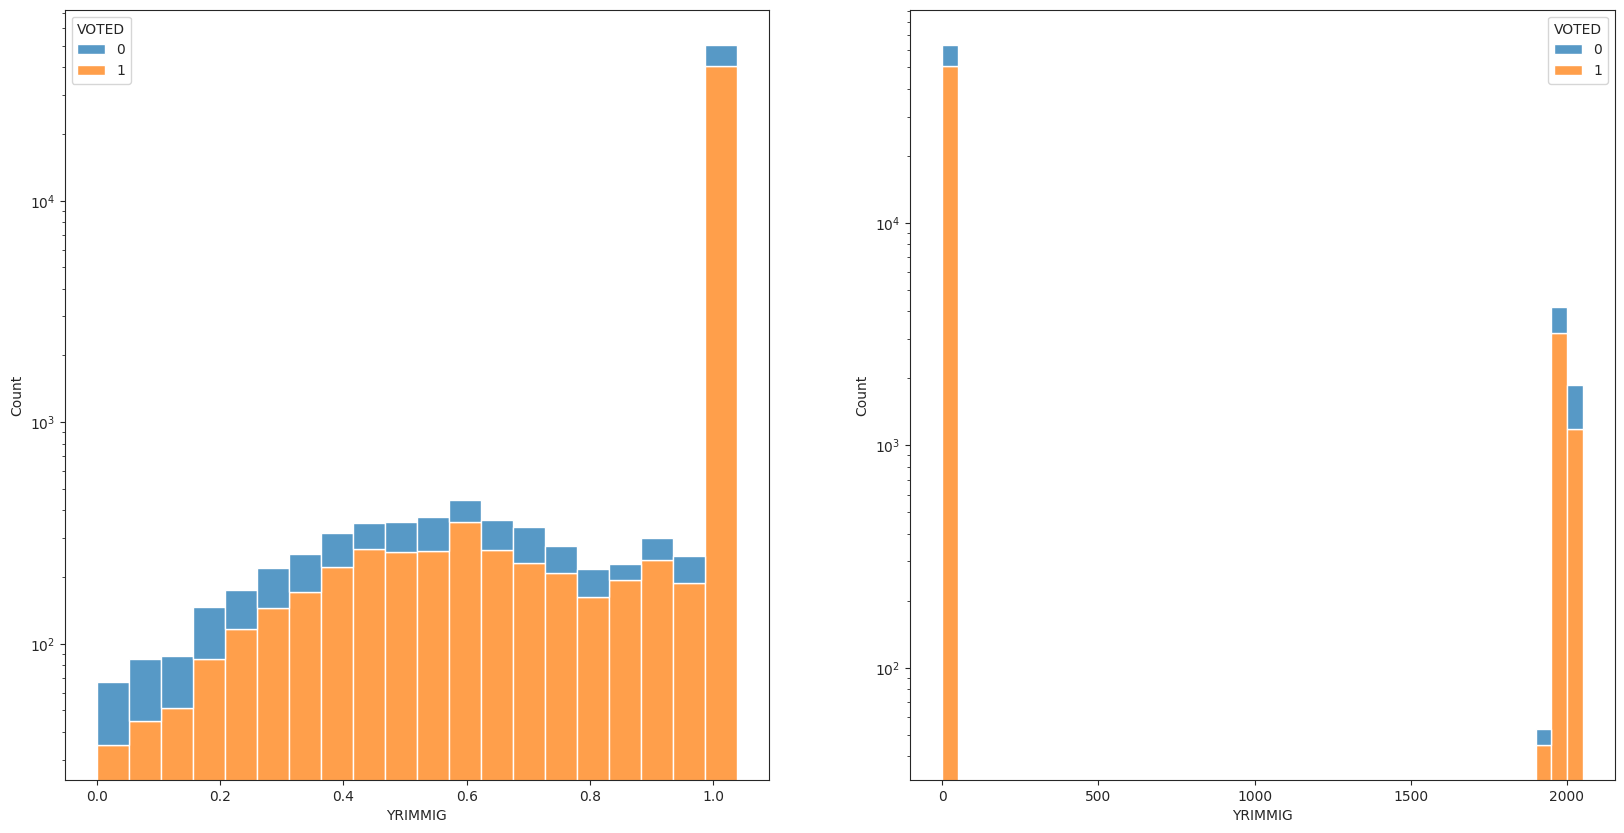

In [6]:
# clean plt figure
plt.clf()
fig, axes = plt.subplots(1,2,figsize=(20,10))
sns.histplot(x="YRIMMIG",hue='VOTED',data=df,multiple='stack',ax=axes[0],bins=20)
axes[0].set_yscale('log')
df_base = pd.read_csv('dataset_v1.csv')
df_base = df_base[df_base['VOTED'].isin([1,2])]
df_base['VOTED'] = df_base['VOTED'].apply(lambda x: 1 if x==2 else 0)
sns.histplot(x="YRIMMIG",hue='VOTED',data=df_base,multiple='stack',ax=axes[1],bins=100, binwidth=50)
axes[1].set_yscale('log')

plt.show()


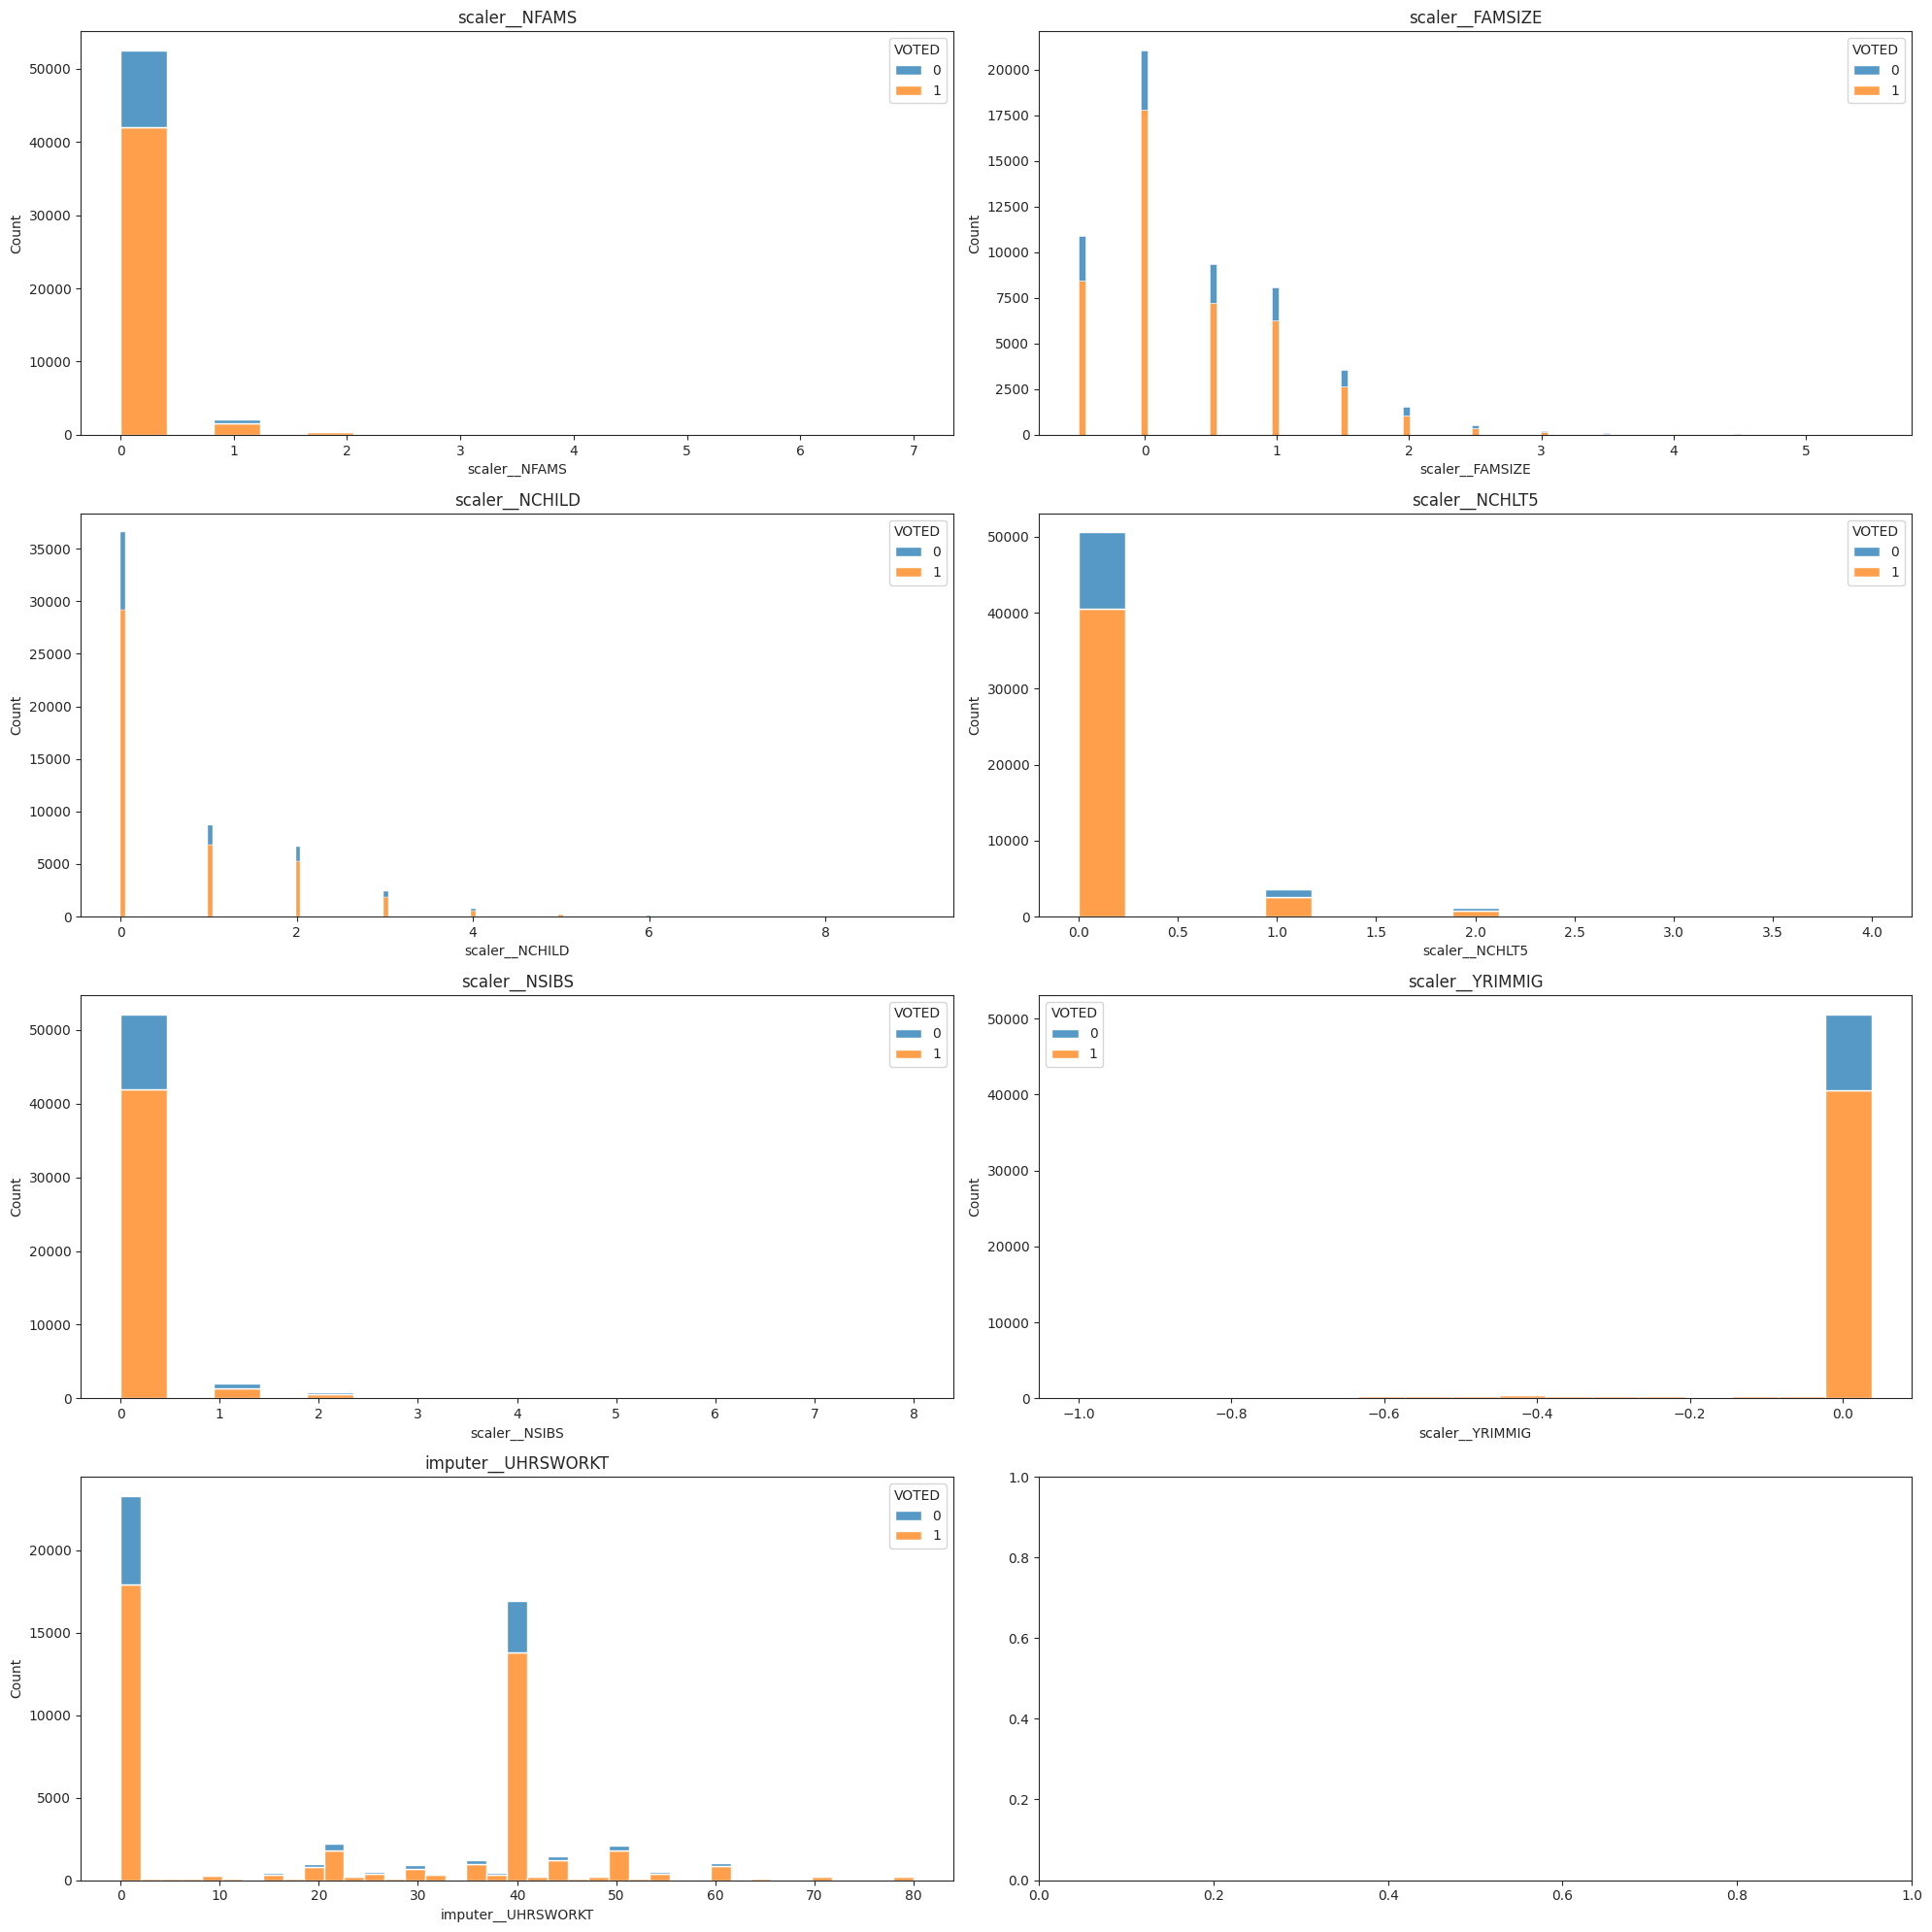

In [7]:
df_p = pd.DataFrame(preprocessing_num.fit_transform(df[num_cols_basic+num_cols_imputate]),columns = preprocessing_num.get_feature_names_out(),index=df.index)
df_p = pd.concat([df_p,df["VOTED"]],axis=1)
fig, axes = plt.subplots(4,2,figsize=(20,20))
for i, c in enumerate(df_p.columns):
    if c =='VOTED':
        continue
    ax = axes.reshape(-1)[i]
    if df_p[c].dtype.kind == 'O':
        ct = pd.crosstab(index=df_p[c], columns=df['VOTED'],normalize='index')
        a = ct.plot(kind='bar', stacked=True,ax=ax)  
    else:
        b = sns.histplot(x=c,hue='VOTED',data=df_p,multiple='stack',ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

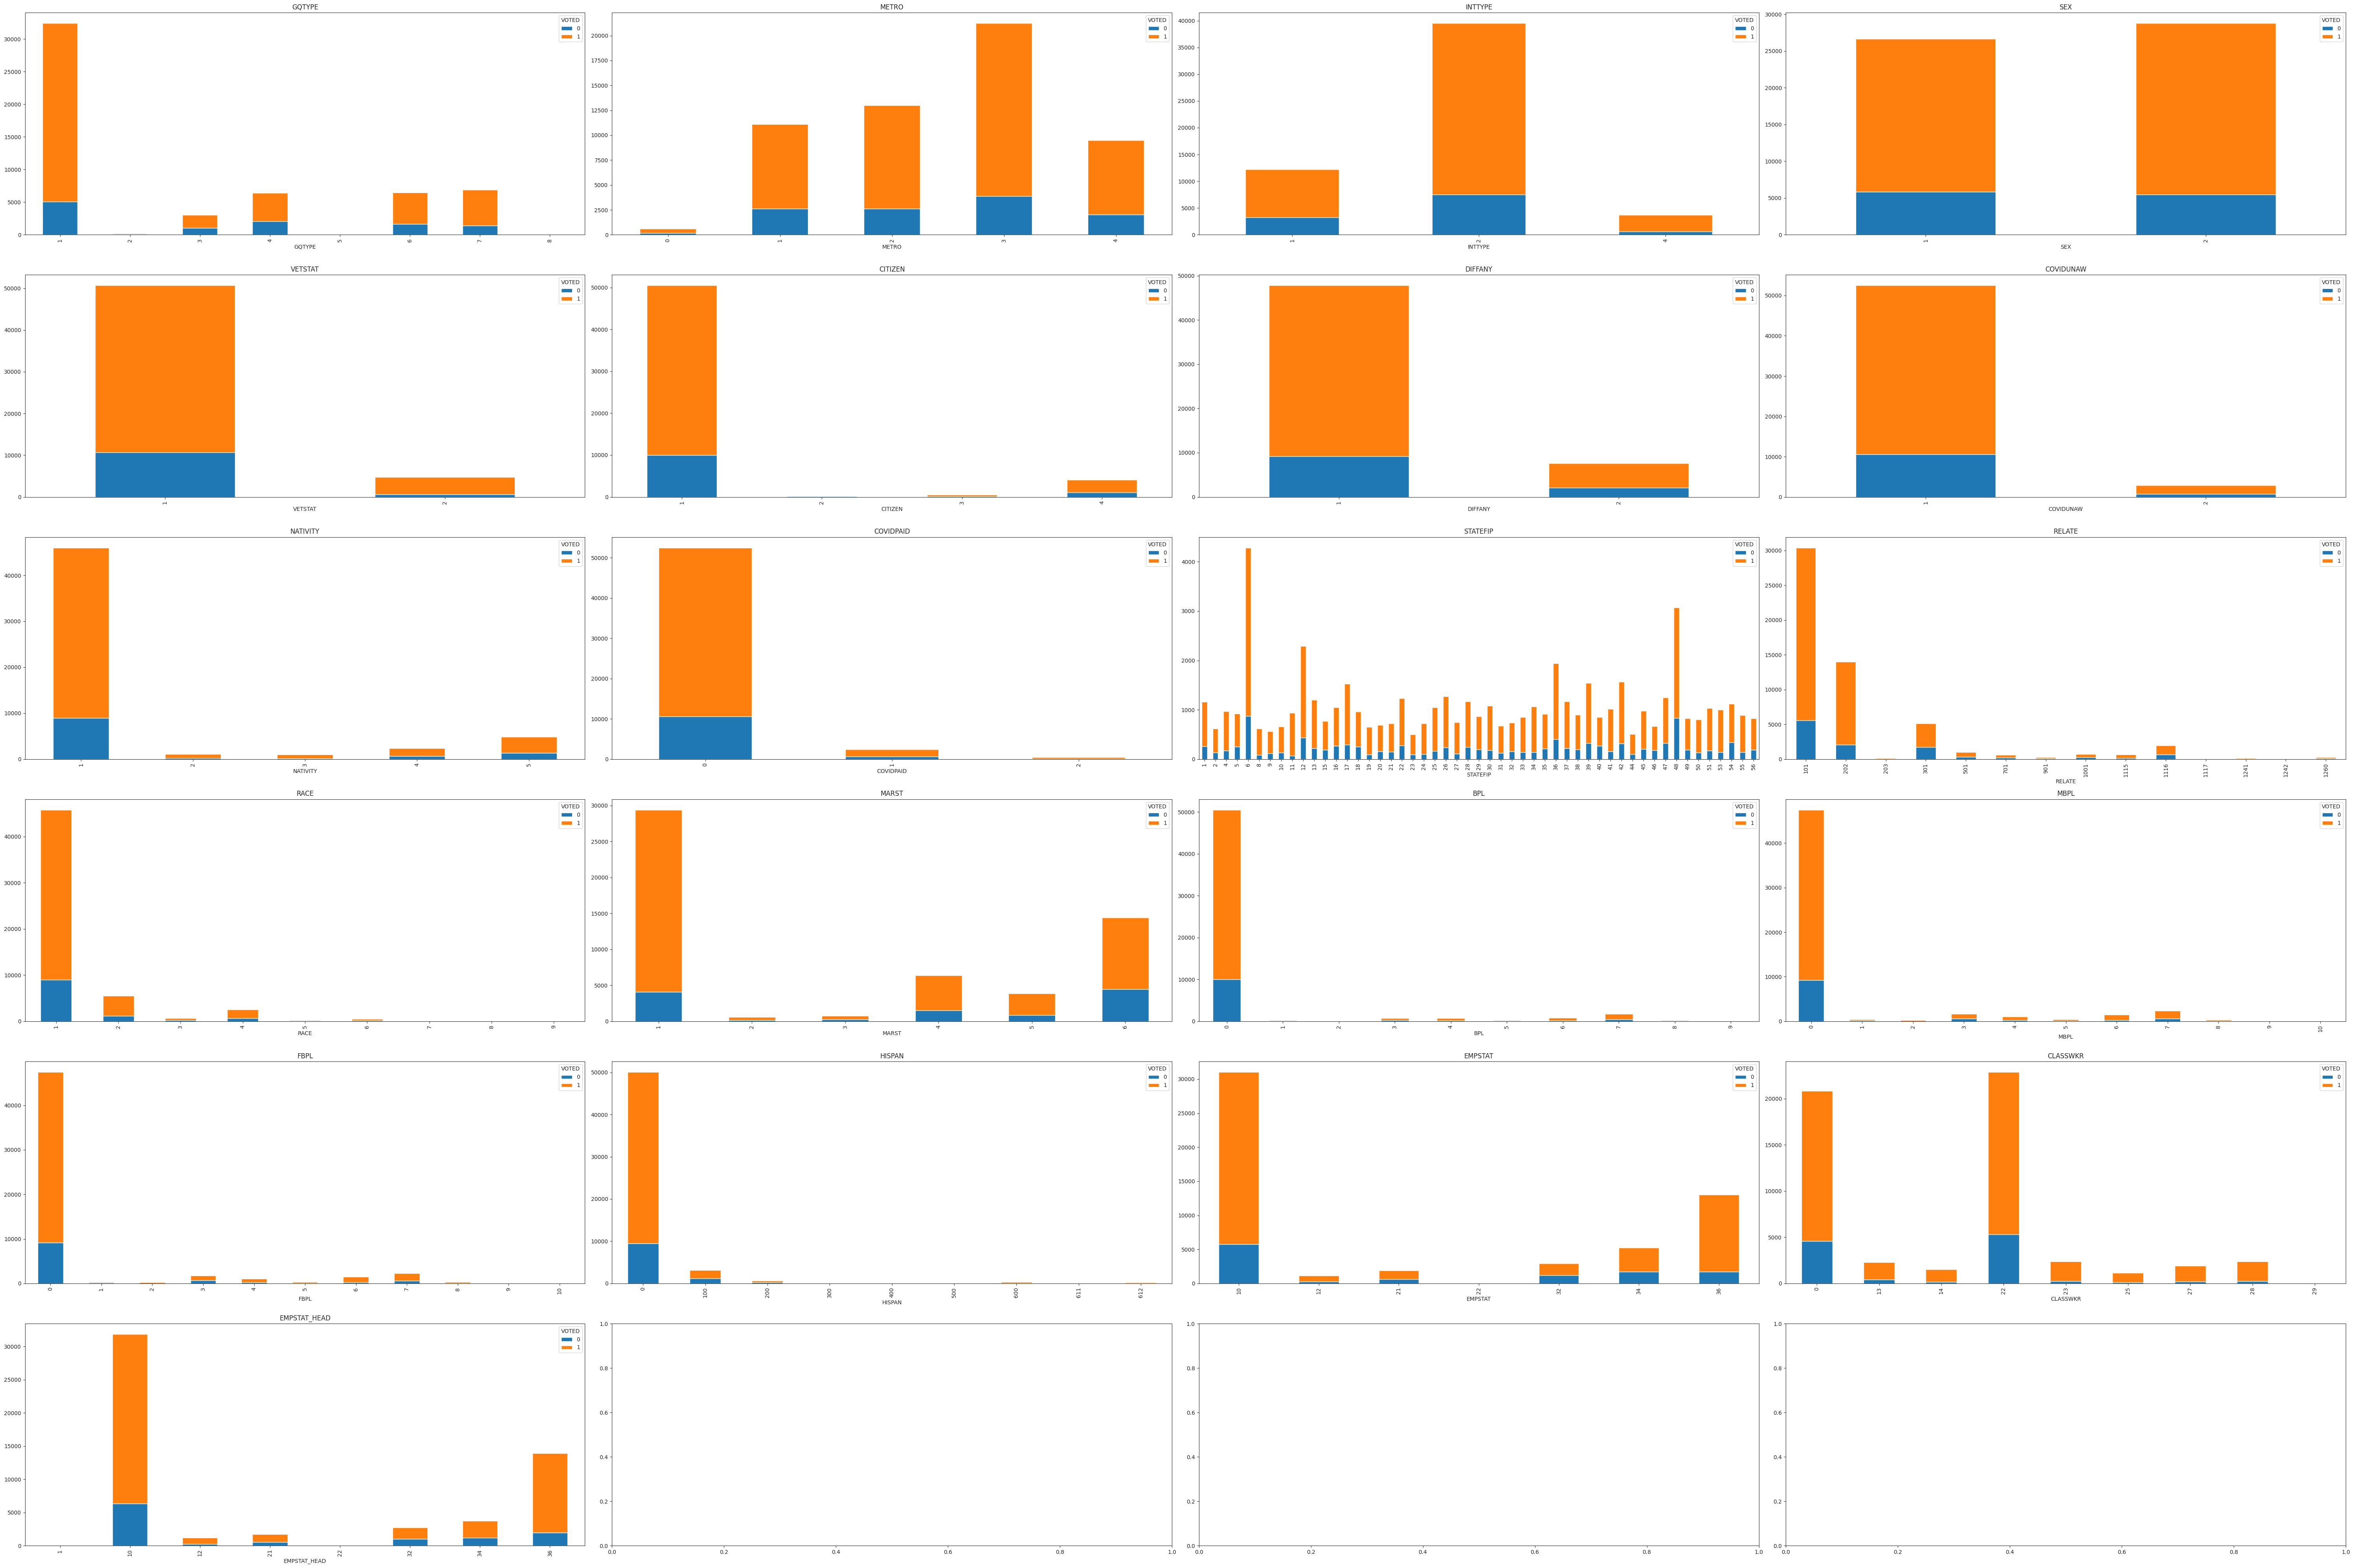

In [8]:
fig, axes = plt.subplots(6,4,figsize=(60,40))
for i, c in enumerate(df[cat_cols_onehot+cat_cols_many].columns):
    if c =='VOTED':
        continue
    ax = axes.reshape(-1)[i]
    if df[c].dtype.kind == 'O':
        ct = pd.crosstab(index=df[c], columns=df['VOTED'])
        a = ct.plot(kind='bar', stacked=True,ax=ax)  
    else:
        b = sns.histplot(x=c,hue='VOTED',data=df,multiple='stack',ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

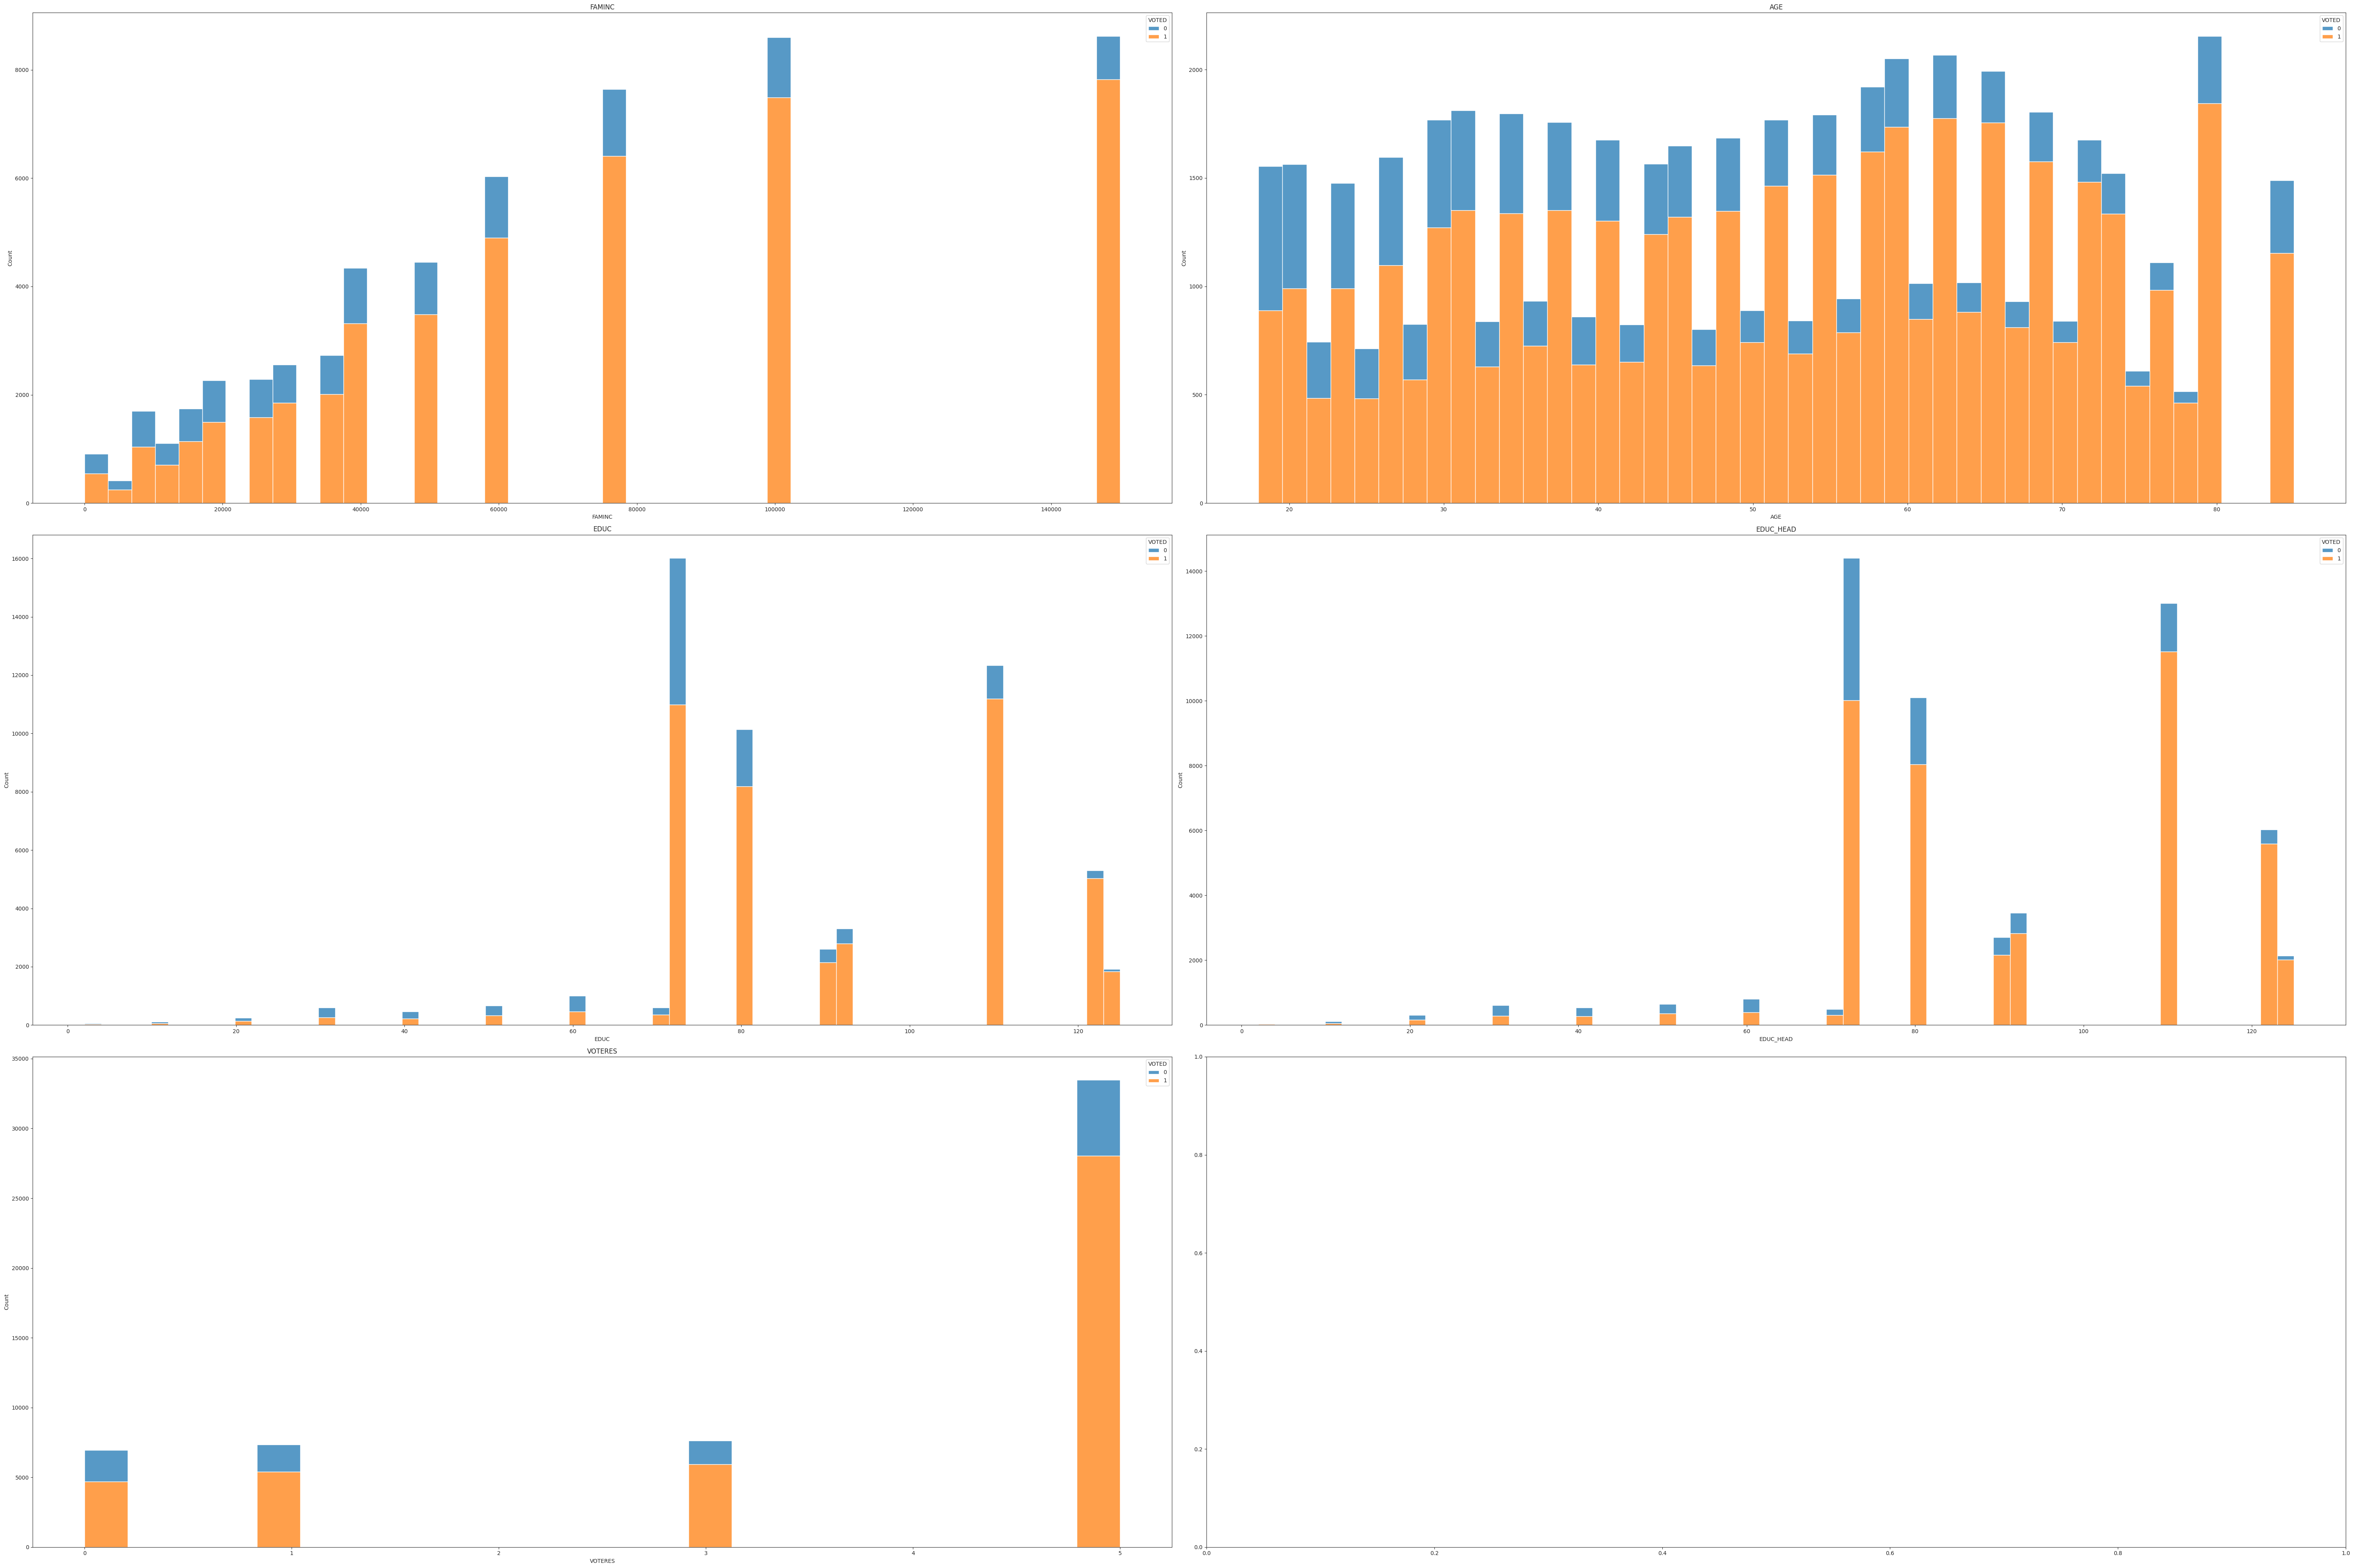

In [9]:
fig, axes = plt.subplots(3,2,figsize=(60,40))
for i, c in enumerate(df[cat_cols_ord].columns):
    if c =='VOTED':
        continue
    ax = axes.reshape(-1)[i]
    if df[c].dtype.kind == 'O':
        ct = pd.crosstab(index=df[c], columns=df['VOTED'],normalize='index')
        a = ct.plot(kind='bar', stacked=True,ax=ax)  
    else:
        b = sns.histplot(x=c,hue='VOTED',data=df,multiple='stack',ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

Estudiem are la correlació entre variables i amb el target

Text(0.5, 1.0, 'Correlation matrix for categorical ordinal variables')

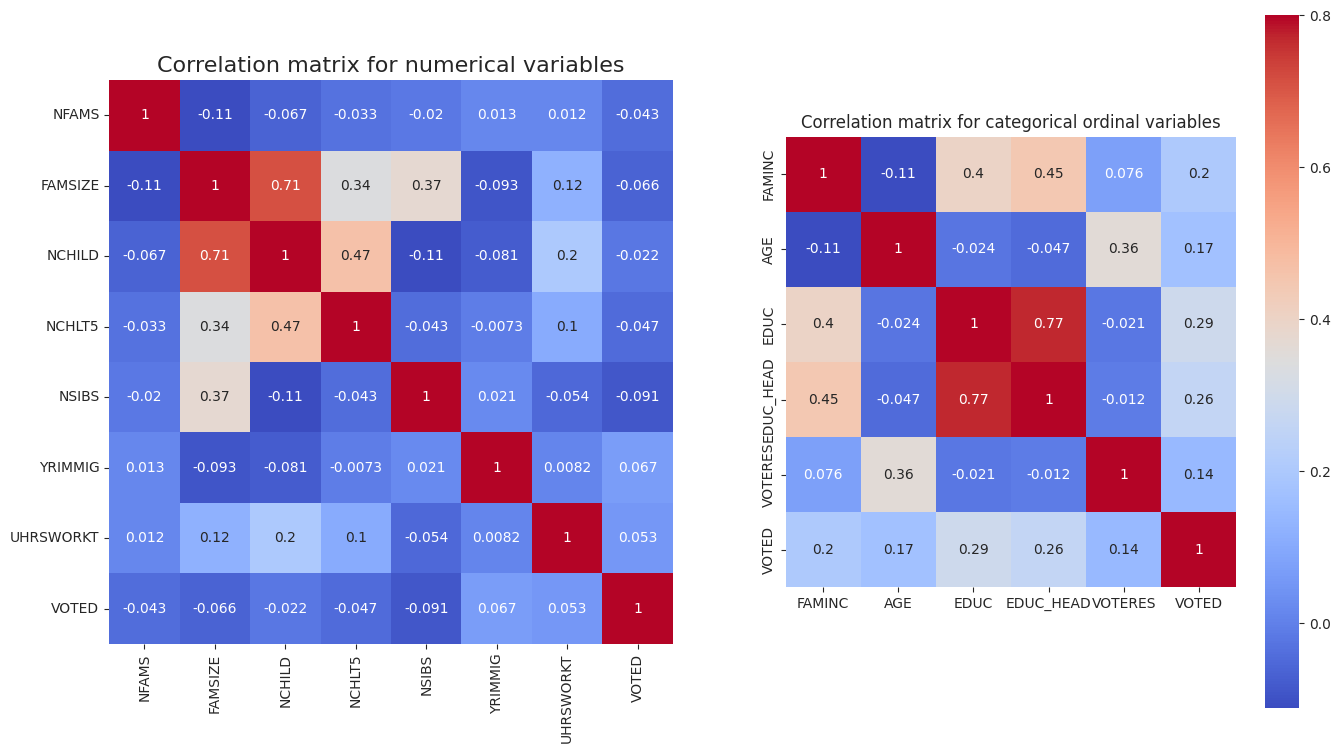

In [10]:
#correlation matrix for numerical variables and target

corrmat1 = df[num_cols_basic+num_cols_imputate+["VOTED"]].corr()
corrmat2 = df[cat_cols_ord+["VOTED"]].corr()
f, ax = plt.subplots(1,2,figsize=(16, 9))
sns.heatmap(corrmat1, ax=ax[0],vmax=.8,cbar=False, square=True,annot=True,cmap="coolwarm")
# set ax1 title
ax[0].set_title("Correlation matrix for numerical variables",fontsize=16)
sns.heatmap(corrmat2, ax=ax[1],vmax=.8, square=True,annot=True,cmap="coolwarm")
# set ax2 title
ax[1].set_title("Correlation matrix for numerical variables",fontsize=32)
plt.title("Correlation matrix for categorical ordinal variables")



Text(0.5, 1.0, 'Correlation with target')

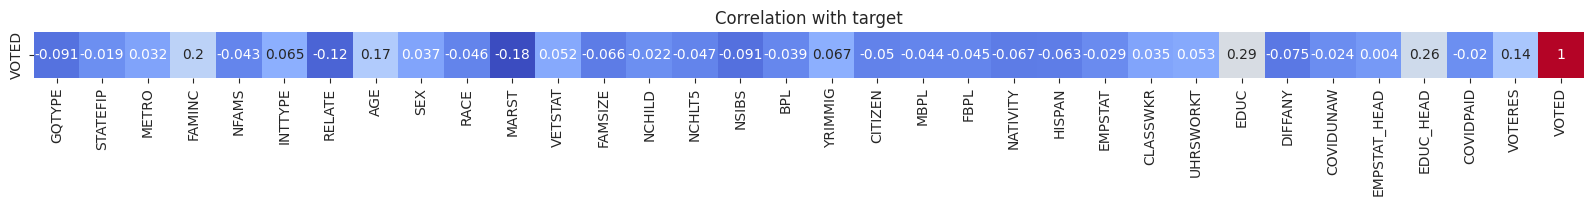

In [11]:
df_n = df.apply(pd.to_numeric, errors='coerce')
corrmat = df_n.corr()
f, ax = plt.subplots(figsize=(20, 9))
row = corrmat.iloc[[-1]]
sns.heatmap(row.sort_values(by=["VOTED"], ascending=False), vmax=.8, cbar=False,square=True,annot=True,cmap="coolwarm")
plt.title("Correlation with target")